In [24]:
import pandas as pd

vectors = pd.read_parquet('../data/vectors/books_descriptions_vectors.parquet')

In [25]:
metadata = pd.read_parquet('../data/transformed/books_metadata.parquet')

In [26]:
vectors.columns = ['id', 'vector']
vectors = vectors.merge(metadata, on="id")
del metadata

In [27]:
vectors = vectors[['id', 'name', 'author_1', 'vector']]

In [28]:
from sklearn.cluster import KMeans, DBSCAN

In [29]:
import numpy as np
vectors = vectors[~vectors['vector'].isnull()]

In [30]:
def kmeans_clustering(data, n_clusters=4, random_state=42):
    """
    Perform KMeans clustering on 300-dimensional data.
    :param data: numpy array of shape (n_samples, 300)
    :param n_clusters: Number of clusters to form.
    :param random_state: Random state for reproducibility.
    :return: Cluster labels and KMeans model.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

In [31]:
labels, kmeans = kmeans_clustering(data=np.vstack(vectors['vector']))

c:\Users\GROSSMANLJ21\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\GROSSMANLJ21\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [32]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


def plot_kmeans_clusters(data, labels):
    """
    Visualize KMeans clusters using PCA for dimensionality reduction.
    :param data: 300-dimensional data (n_samples, 300)
    :param labels: Cluster labels assigned by KMeans
    """
    pca = PCA(n_components=2)  # Reduce to 2D for visualization
    reduced_data = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label="Cluster")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("KMeans Clustering Visualization (PCA Reduced)")
    plt.show()

In [33]:
kmeans

KMeans(n_clusters=4, random_state=42)

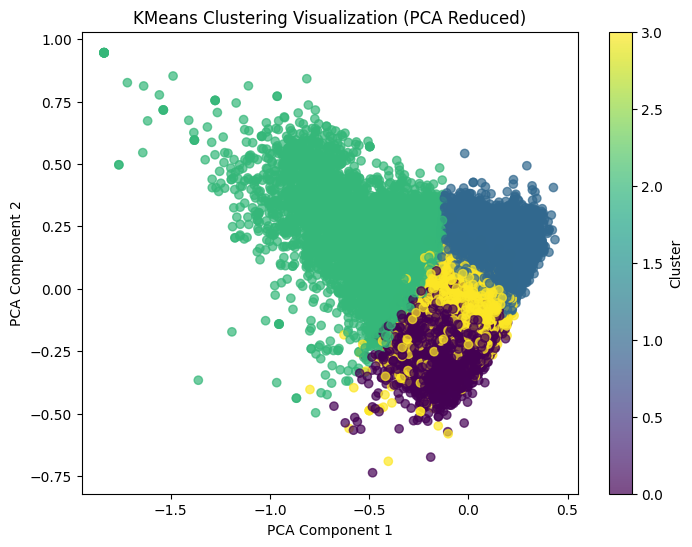

In [34]:
plot_kmeans_clusters(np.vstack(vectors['vector']), labels=labels)

In [35]:
def report_cluster():
    unique_clusters = np.unique(labels)
    print("\nKMeans Cluster Report:")
    for cluster in unique_clusters:
        cluster_indices = np.where(labels == cluster)[0]
        print(f"Cluster {cluster}: {len(cluster_indices)} points")

In [36]:
report_cluster()


KMeans Cluster Report:
Cluster 0: 21288 points
Cluster 1: 36865 points
Cluster 2: 9009 points
Cluster 3: 32401 points
